2025-05-06 18:12:25,734 - __main__ - INFO - Iniciando pipeline de entrenamiento XGBoost


      id  superficie_interior_m2  superficie_exterior_m2  numero_habitacions  \
0  25521                   44.96                    0.00                   1   
1   4843                   93.55                   87.26                   2   
2  27734                  273.64                  187.29                   1   
3  22142                  171.82                   54.89                   4   
4  14748                     NaN                 2153.49                   1   

   numero_banos  ano_construccion  lonxitude  latitude  \
0             2              1947      -8.17     43.20   
1             2              1977      -7.23     43.60   
2             1              1996      -8.40     42.25   
3             2              1996      -6.81     43.15   
4             1              1990      -8.76     42.92   

   temperatura_media_mes_construccion tipo_edificacion calidade_materiais  \
0                               24.75      Apartamento              Media   
1               

2025-05-06 18:12:25,773 - __main__ - INFO - Datos cargados correctamente: 20000 filas, 20 columnas
2025-05-06 18:12:25,984 - __main__ - INFO - 
Resumen estadístico:
2025-05-06 18:12:30,240 - __main__ - INFO - Dimensiones: (20000, 20)
2025-05-06 18:12:30,254 - __main__ - INFO - Valores faltantes por columna:
superficie_interior_m2    1007
superficie_exterior_m2    1027
distancia_centro_km       1011
distancia_escola_km       1021
indice_criminalidade       988
dtype: int64
2025-05-06 18:12:30,257 - __main__ - INFO - Columnas numéricas: 12
2025-05-06 18:12:30,263 - __main__ - INFO - Columnas categóricas: 6
2025-05-06 18:12:30,519 - __main__ - INFO - Iniciando preprocesamiento de datos
2025-05-06 18:12:30,823 - __main__ - INFO - Imputador y scaler guardados en models
2025-05-06 18:12:30,985 - __main__ - INFO - Codificadores guardados en models
2025-05-06 18:12:30,989 - __main__ - INFO - División de datos: 17000 muestras de entrenamiento, 3000 de validación
2025-05-06 18:12:30,990 - __main

[0]	train-mae:197604.43300	validation-mae:197381.51703
[10]	train-mae:64825.58239	validation-mae:65074.21970
[20]	train-mae:37852.19508	validation-mae:39338.13292
[30]	train-mae:32387.51924	validation-mae:34315.41275
[40]	train-mae:30266.66553	validation-mae:32549.44876
[50]	train-mae:29299.11182	validation-mae:31733.46536
[60]	train-mae:28513.80674	validation-mae:31081.31212
[70]	train-mae:28027.46179	validation-mae:30740.33860
[80]	train-mae:27640.80829	validation-mae:30515.54089
[90]	train-mae:27267.24626	validation-mae:30264.96368
[99]	train-mae:27042.56969	validation-mae:30256.25365


2025-05-06 18:12:36,075 - __main__ - INFO - Evaluación en validación:
2025-05-06 18:12:36,075 - __main__ - INFO -   MAE: 30256.2536 (métrica principal)
2025-05-06 18:12:36,091 - __main__ - INFO -   RMSE: 41439.7327
2025-05-06 18:12:36,099 - __main__ - INFO -   R²: 0.9381
2025-05-06 18:12:36,108 - __main__ - INFO -   MAPE: 20.00%
2025-05-06 18:12:36,124 - __main__ - INFO -   MedianAE: 23671.0312
2025-05-06 18:12:40,504 - __main__ - INFO - Gráfico de importancia guardado en models/feature_importance.png
2025-05-06 18:12:40,664 - __main__ - INFO - Modelo final guardado en models/xgboost_model.json
2025-05-06 18:12:40,665 - __main__ - INFO - Generando predicciones para test.csv
2025-05-06 18:12:41,061 - __main__ - ERROR - Error en el pipeline: feature_names mismatch: ['superficie_interior_m2', 'superficie_exterior_m2', 'numero_habitacions', 'numero_banos', 'ano_construccion', 'lonxitude', 'latitude', 'temperatura_media_mes_construccion', 'tipo_edificacion', 'calidade_materiais', 'cor_favor

ValueError: feature_names mismatch: ['superficie_interior_m2', 'superficie_exterior_m2', 'numero_habitacions', 'numero_banos', 'ano_construccion', 'lonxitude', 'latitude', 'temperatura_media_mes_construccion', 'tipo_edificacion', 'calidade_materiais', 'cor_favorita_propietario', 'distancia_centro_km', 'distancia_escola_km', 'indice_criminalidade', 'acceso_transporte_publico', 'orientacion', 'eficiencia_enerxetica', 'numero_arboles_xardin'] ['Unnamed: 0', 'superficie_interior_m2', 'superficie_exterior_m2', 'numero_habitacions', 'numero_banos', 'ano_construccion', 'lonxitude', 'latitude', 'temperatura_media_mes_construccion', 'tipo_edificacion', 'calidade_materiais', 'cor_favorita_propietario', 'distancia_centro_km', 'distancia_escola_km', 'indice_criminalidade', 'acceso_transporte_publico', 'orientacion', 'eficiencia_enerxetica', 'numero_arboles_xardin']
training data did not have the following fields: Unnamed: 0

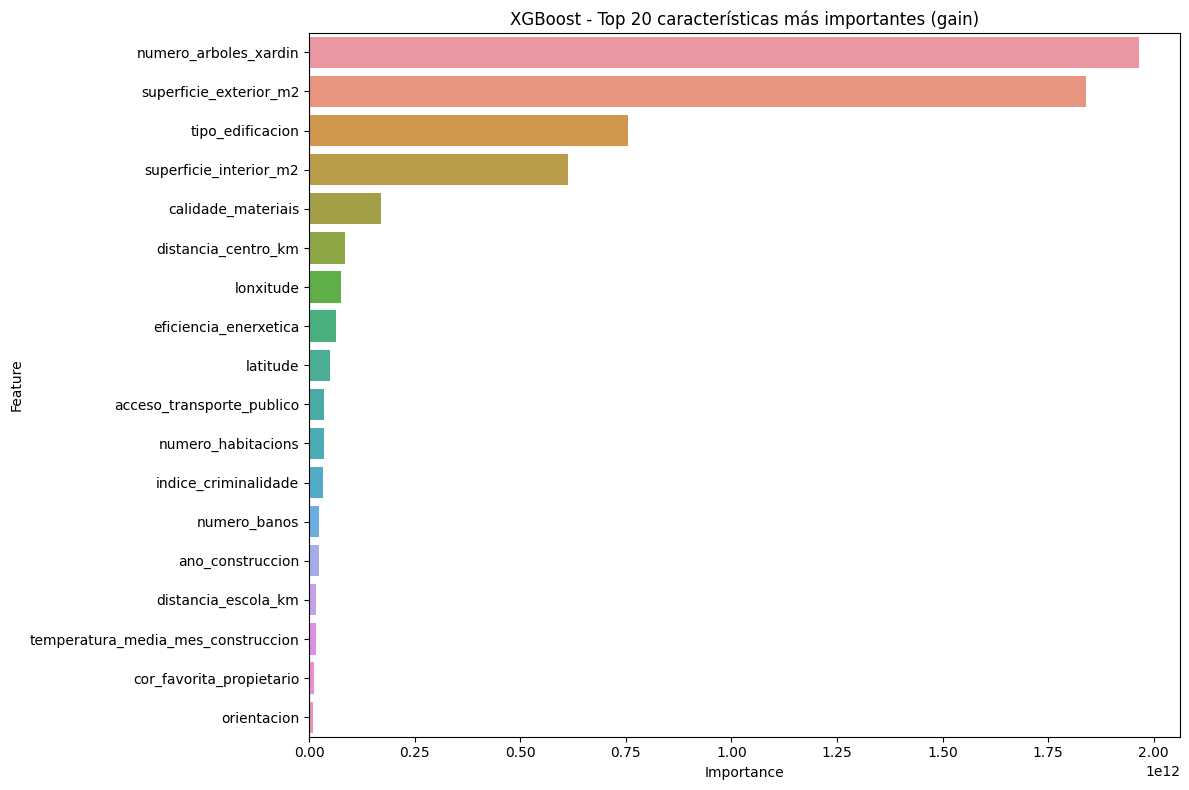

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
XGBoost Modeling Pipeline (MAE Optimized)
----------------------------------------
Script optimizado para entrenamiento de un modelo XGBoost con validación cruzada,
búsqueda de hiperparámetros usando Optuna, y generación de predicciones para test.
Este script está específicamente optimizado para minimizar el Error Absoluto Medio (MAE).
Características:
- Optimización enfocada en MAE en lugar de RMSE
- Preprocesamiento robusto con manejo inteligente de valores faltantes
- Validación cruzada con múltiples métricas de evaluación
- Optimización bayesiana de hiperparámetros con Optuna
- Análisis de importancia de características
- Serialización de todos los componentes del pipeline
- Logging detallado
"""
import os
import time
import logging
import warnings
import json
from typing import Dict, List, Tuple, Union, Optional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("xgboost_training.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Ignorar warnings específicos
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# -----------------------------------------------------------------------------
# Configuración
# -----------------------------------------------------------------------------
CONFIG = {
    # Rutas
    'data_path': 'train.csv',
    'test_path': 'test.csv',
    'output_dir': 'models',
    
    # Nombres de archivos
    'model_file': 'xgboost_model.json',
    'encoders_file': 'label_encoders.pkl',
    'scaler_file': 'scaler.pkl',
    'imputer_file': 'imputer.pkl',
    'feature_importance_file': 'feature_importance.png',
    'submission_file': 'submission_mae.csv',
    'config_file': 'model_config.json',
    
    # Parámetros de división de datos
    'test_size': 0.15,          # Aumentado para una validación más robusta
    'random_state': 42,
    
    # Parámetros XGBoost
    'eval_metric': 'mae',       # Cambiado a MAE como métrica principal
    'cv_folds': 5,
    'max_boost_rounds': 100,   # Aumentado para permitir más iteraciones
    'early_stopping_rounds': 50,
    
    # Optuna
    'n_trials': 2,           # Número de combinaciones de hiperparámetros a probar
    'timeout': 3600,           # Tiempo máximo en segundos (1 hora)
    
    # Target y columna ID
    'target_column': 'prezo_euros',
    'id_column': 'id',
    
    # Hardware
    'use_gpu': True,          # Cambiar a True si tienes GPU disponible
}

# Crear directorio de salida
os.makedirs(CONFIG['output_dir'], exist_ok=True)

# Guardar configuración
with open(os.path.join(CONFIG['output_dir'], CONFIG['config_file']), 'w') as f:
    json.dump(CONFIG, f, indent=4)

# -----------------------------------------------------------------------------
# Funciones auxiliares
# -----------------------------------------------------------------------------
def load_data(data_path: str) -> pd.DataFrame:
    """Carga los datos desde un archivo CSV."""
    try:
        df = pd.read_csv(data_path)
        #df.drop('log_prezo', axis=1, inplace=True)
        print(df.head())
        logger.info(f"Datos cargados correctamente: {df.shape[0]} filas, {df.shape[1]} columnas")
        return df
    except Exception as e:
        logger.error(f"Error al cargar datos: {str(e)}")
        raise

def analyze_data(df: pd.DataFrame) -> Tuple[List[str], List[str], List[str]]:
    """
    Analiza el dataframe y clasifica las columnas.
    
    Returns:
        Tuple con listas de columnas numéricas, categóricas y la columna objetivo
    """
    # Detectar automáticamente tipos de columnas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remover columna objetivo y ID de las listas
    if CONFIG['target_column'] in num_cols:
        num_cols.remove(CONFIG['target_column'])
    if CONFIG['id_column'] in num_cols:
        num_cols.remove(CONFIG['id_column'])
    if CONFIG['id_column'] in cat_cols:
        cat_cols.remove(CONFIG['id_column'])
        
    logger.info(f"Columnas numéricas: {len(num_cols)}")
    logger.info(f"Columnas categóricas: {len(cat_cols)}")
    
    return num_cols, cat_cols, [CONFIG['target_column']]

def preprocess_data(df: pd.DataFrame, num_cols: List[str], cat_cols: List[str], 
                   is_training: bool = True) -> Tuple[pd.DataFrame, Dict, Dict]:
    """
    Preprocesa los datos aplicando imputación, codificación y escalado.
    
    Args:
        df: DataFrame original
        num_cols: Lista de columnas numéricas
        cat_cols: Lista de columnas categóricas
        is_training: Si es True, entrena los transformadores, si no, usa los guardados
        
    Returns:
        DataFrame preprocesado, diccionarios con transformadores
    """
    X = df.copy()
    
    # Inicializar diccionarios para almacenar transformadores
    label_encoders = {}
    
    # Procesar columnas numéricas
    if is_training:
        # Imputar valores faltantes con la mediana
        num_imputer = SimpleImputer(strategy='median')
        X[num_cols] = num_imputer.fit_transform(X[num_cols])
        
        # Escalar características numéricas
        scaler = RobustScaler()  # Más robusto a outliers que StandardScaler
        X[num_cols] = scaler.fit_transform(X[num_cols])
        
        # Guardar imputer y scaler
        joblib.dump(num_imputer, os.path.join(CONFIG['output_dir'], CONFIG['imputer_file']))
        joblib.dump(scaler, os.path.join(CONFIG['output_dir'], CONFIG['scaler_file']))
        logger.info(f"Imputador y scaler guardados en {CONFIG['output_dir']}")
    else:
        # Cargar imputer y scaler
        num_imputer = joblib.load(os.path.join(CONFIG['output_dir'], CONFIG['imputer_file']))
        scaler = joblib.load(os.path.join(CONFIG['output_dir'], CONFIG['scaler_file']))
        
        # Aplicar transformaciones
        X[num_cols] = num_imputer.transform(X[num_cols])
        X[num_cols] = scaler.transform(X[num_cols])
    
    # Procesar columnas categóricas
    if is_training:
        for col in cat_cols:
            # Primero rellenar valores faltantes
            X[col] = X[col].fillna('Missing').astype(str)
            
            # Codificar categorías
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
        
        # Guardar encoders
        joblib.dump(label_encoders, os.path.join(CONFIG['output_dir'], CONFIG['encoders_file']))
        logger.info(f"Codificadores guardados en {CONFIG['output_dir']}")
    else:
        # Cargar encoders
        label_encoders = joblib.load(os.path.join(CONFIG['output_dir'], CONFIG['encoders_file']))
        
        # Aplicar encoders a cada columna categórica
        for col in cat_cols:
            if col in label_encoders:
                # Manejar valores nuevos no vistos durante el entrenamiento
                X[col] = X[col].fillna('Missing').astype(str)
                # Reemplazar categorías desconocidas con 'Missing'
                X[col] = X[col].map(lambda x: x if x in label_encoders[col].classes_ else 'Missing')
                X[col] = label_encoders[col].transform(X[col])
    
    return X, num_imputer, label_encoders

def evaluate_model(model, X_val, y_val):
    """Evalúa el modelo en el conjunto de validación."""
    dval = xgb.DMatrix(X_val)
    preds = model.predict(dval)
    
    # Calcular múltiples métricas de evaluación
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    
    # Calcular métricas adicionales específicas para regresión
    # Error porcentual absoluto medio (MAPE)
    mape = np.mean(np.abs((y_val - preds) / y_val)) * 100
    # Error absoluto mediano (MedianAE)
    median_ae = np.median(np.abs(y_val - preds))
    
    logger.info(f"Evaluación en validación:")
    logger.info(f"  MAE: {mae:.4f} (métrica principal)")
    logger.info(f"  RMSE: {rmse:.4f}")
    logger.info(f"  R²: {r2:.4f}")
    logger.info(f"  MAPE: {mape:.2f}%")
    logger.info(f"  MedianAE: {median_ae:.4f}")
    
    return {
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mape': mape,
        'median_ae': median_ae
    }

def plot_feature_importance(model, features: List[str]):
    """Visualiza la importancia de características."""
    importance = model.get_score(importance_type='gain')
    importance_df = pd.DataFrame({
        'Feature': list(importance.keys()),
        'Importance': list(importance.values())
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('XGBoost - Top 20 características más importantes (gain)')
    plt.tight_layout()
    
    # Guardar figura
    output_path = os.path.join(CONFIG['output_dir'], CONFIG['feature_importance_file'])
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    logger.info(f"Gráfico de importancia guardado en {output_path}")

def objective(trial, X, y, cv_folds=5):
    """
    Función objetivo para Optuna que optimiza los hiperparámetros de XGBoost.
    
    Args:
        trial: Objeto de Optuna para sugerir hiperparámetros
        X: Features de entrenamiento
        y: Target de entrenamiento
        cv_folds: Número de folds para validación cruzada
        
    Returns:
        Métrica de error promedio (MAE) en validación cruzada
    """
    # Espacio de búsqueda de hiperparámetros
    params = {
        'objective': 'reg:squarederror',  # Mantenemos objetivo cuadrático para el entrenamiento
        'eval_metric': CONFIG['eval_metric'],  # MAE para evaluación
        
        # Hiperparámetros principales
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        
        # Regularización
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        
        # Configuración adicional
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'max_leaves': trial.suggest_int('max_leaves', 0, 256),
        'max_bin': trial.suggest_int('max_bin', 256, 512),
    }
    
    # Si se usa GPU, añadir tree_method y predictor
    if CONFIG['use_gpu']:
        params.update({
            'tree_method': 'gpu_hist',
            'predictor': 'gpu_predictor',
        })
    else:
        params.update({
            'tree_method': 'hist',
        })
    
    # Definir folds para validación cruzada
    # Si el target es continuo, usar KFold
    # Si es categórico o discreto, considerar StratifiedKFold
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=CONFIG['random_state'])
    
    # Lista para almacenar resultados de cada fold
    mae_scores = []
    
    # Realizar validación cruzada manualmente
    for train_idx, val_idx in kf.split(X):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Convertir a DMatrix
        dtrain = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval = xgb.DMatrix(X_fold_val, label=y_fold_val)
        
        # Entrenar modelo
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=CONFIG['max_boost_rounds'],
            evals=[(dval, 'val')],
            early_stopping_rounds=CONFIG['early_stopping_rounds'],
            verbose_eval=False
        )
        
        # Evaluar usando MAE
        preds = model.predict(dval)
        mae = mean_absolute_error(y_fold_val, preds)
        mae_scores.append(mae)
    
    # Retornar la media de los scores MAE
    return np.mean(mae_scores)

# -----------------------------------------------------------------------------
# Flujo principal
# -----------------------------------------------------------------------------
def main():
    """Función principal que ejecuta todo el pipeline de modelado."""
    start_time = time.time()
    logger.info("Iniciando pipeline de entrenamiento XGBoost")
    
    # 1. Cargar datos
    df = load_data(CONFIG['data_path'])
    
    # 2. Análisis exploratorio básico
    logger.info("\nResumen estadístico:")
    logger.info(f"Dimensiones: {df.shape}")
    logger.info(f"Valores faltantes por columna:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    
    # 3. Separar target y features
    num_cols, cat_cols, target_cols = analyze_data(df)
    y = df[CONFIG['target_column']].copy()
    X = df.drop(columns=[CONFIG['target_column']]).copy()
    
    if CONFIG['id_column'] in X.columns:
        X = X.drop(columns=[CONFIG['id_column']])
    
    # 4. Preprocesamiento
    logger.info("Iniciando preprocesamiento de datos")
    X_processed, imputer, label_encoders = preprocess_data(X, num_cols, cat_cols)
    
    # 5. División train/validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_processed, y, 
        test_size=CONFIG['test_size'], 
        random_state=CONFIG['random_state']
    )
    
    logger.info(f"División de datos: {X_train.shape[0]} muestras de entrenamiento, {X_val.shape[0]} de validación")
    
    # 6. Optimización de hiperparámetros con Optuna
    logger.info(f"Iniciando búsqueda de hiperparámetros con Optuna ({CONFIG['n_trials']} trials)")
    
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(seed=CONFIG['random_state'])
    )
    
    study.optimize(
        lambda trial: objective(trial, X_processed, y, CONFIG['cv_folds']),
        n_trials=CONFIG['n_trials'],
        timeout=CONFIG['timeout']
    )
    
    logger.info("Mejores hiperparámetros encontrados:")
    for param, value in study.best_params.items():
        logger.info(f"  {param}: {value}")
    logger.info(f"Mejor MAE CV: {study.best_value:.4f}")
    
    # 7. Entrenamiento del modelo final con los mejores hiperparámetros
    logger.info("Entrenando modelo final con los mejores hiperparámetros")
    
    # Preparar DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    
    # Configurar parámetros finales - CAMBIO AQUÍ: Usamos reg:squarederror en lugar de reg:absoluteerror
    final_params = study.best_params.copy()
    if CONFIG['use_gpu']:
        final_params.update({
            'tree_method': 'gpu_hist',
            'predictor': 'gpu_predictor',
            'objective': 'reg:squarederror',  # Usamos reg:squarederror compatible con todas las versiones
            'eval_metric': CONFIG['eval_metric']  # Mantenemos mae como métrica de evaluación
        })
    else:
        final_params.update({
            'tree_method': 'hist',
            'objective': 'reg:squarederror',  # Usamos reg:squarederror compatible con todas las versiones
            'eval_metric': CONFIG['eval_metric']  # Mantenemos mae como métrica de evaluación
        })
    
    # Entrenar modelo final
    final_model = xgb.train(
        final_params,
        dtrain,
        num_boost_round=CONFIG['max_boost_rounds'],
        evals=[(dtrain, 'train'), (dval, 'validation')],
        early_stopping_rounds=CONFIG['early_stopping_rounds'],
        verbose_eval=10  # Cambiado a 10 para ver más actualizaciones
    )
    
    # 8. Evaluar modelo final
    metrics = evaluate_model(final_model, X_val, y_val)
    
    # 9. Visualizar importancia de características
    plot_feature_importance(final_model, X.columns.tolist())
    
    # 10. Guardar modelo final
    model_path = os.path.join(CONFIG['output_dir'], CONFIG['model_file'])
    final_model.save_model(model_path)
    logger.info(f"Modelo final guardado en {model_path}")
    
    # 11. Generar predicciones para test si existe
    test_path = CONFIG['test_path']
    if os.path.exists(test_path):
        logger.info(f"Generando predicciones para {test_path}")
        df_test = pd.read_csv(test_path)
        
        # Guardar ID antes de preprocesar
        test_ids = df_test[CONFIG['id_column']].copy()
        
        # Preprocesamiento de test con los mismos transformadores
        if CONFIG['id_column'] in df_test.columns:
            X_test = df_test.drop(columns=[CONFIG['id_column']])
        else:
            X_test = df_test.copy()
        
        # Aplicar el mismo preprocesamiento
        X_test_processed, _, _ = preprocess_data(
            X_test, num_cols, cat_cols, is_training=False
        )
        
        # Predecir
        dtest = xgb.DMatrix(X_test_processed)
        test_preds = final_model.predict(dtest)
        
        # Crear submission
        submission = pd.DataFrame({
            CONFIG['id_column']: test_ids, 
            CONFIG['target_column']: test_preds
        })
        
        # Guardar submission
        submission_path = os.path.join(CONFIG['output_dir'], CONFIG['submission_file'])
        submission.to_csv(submission_path, index=False)
        logger.info(f"Predicciones guardadas en {submission_path}")
    
    # 12. Resumen final
    elapsed_time = time.time() - start_time
    logger.info(f"Pipeline completado en {elapsed_time/60:.2f} minutos")
    logger.info(f"MAE final: {metrics['mae']:.4f} (métrica principal)")
    logger.info(f"RMSE final: {metrics['rmse']:.4f}")
    logger.info(f"MAPE final: {metrics['mape']:.2f}%")
    logger.info(f"MedianAE final: {metrics['median_ae']:.4f}")
    logger.info(f"R² final: {metrics['r2']:.4f}")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        logger.exception(f"Error en el pipeline: {str(e)}")
        raise